# Import Libraries

In [1]:
import pandas as pd #used for date analysis and manipulation
import numpy as np #used for mathematical functions
from datetime import datetime
import matplotlib.pyplot as plt #used for creating graphs
%matplotlib inline
import seaborn as sns #visulation library based on matplotlib
import folium #Supports Map functions
from folium import plugins

# Deeper Data Exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
#list contents of drive, case sensitive
!ls "/content/drive/My Drive/Data Analytics/Data Analytics 2/Colab Notebooks/Abnb Project"

AB_NYC_2019.csv  AirBnbPart2.ipynb  LICENSE  README.md


In [4]:
#Change from root to working directory
%cd "/content/drive/My Drive/Data Analytics/Data Analytics 2/Colab Notebooks/Abnb Project"

/content/drive/My Drive/Data Analytics/Data Analytics 2/Colab Notebooks/Abnb Project


In [5]:
# load data set
df=pd.read_csv('AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#percentile list
perc=[.25,.50,.75,.95]

#list of data types to include
include=['object', 'Float', 'int']

In [8]:
#Describe the price column to determine what outliers exist
desc = df["price"].describe(percentiles = perc, include = include)
desc

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
95%        355.000000
max      10000.000000
Name: price, dtype: float64

[Text(0, 0, '100'),
 Text(0, 0, '150'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '200'),
 Text(0, 0, '75'),
 Text(0, 0, '80'),
 Text(0, 0, '65'),
 Text(0, 0, '70'),
 Text(0, 0, '120')]

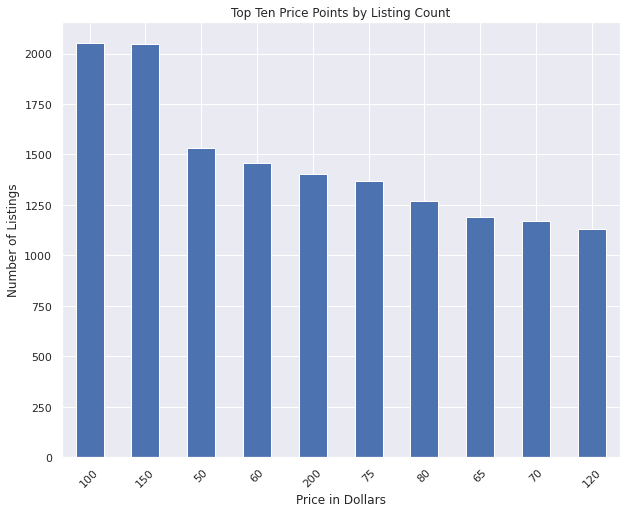

In [9]:
#Visualize the top price points and count of listings.
price = df['price'].value_counts().head(10)
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = price.plot(kind='bar')
viz_bar.set_title('Top Ten Price Points by Listing Count')
viz_bar.set_xlabel('Price in Dollars')
viz_bar.set_ylabel('Number of Listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(),rotation=45)

In [10]:
df.shape

(48895, 16)

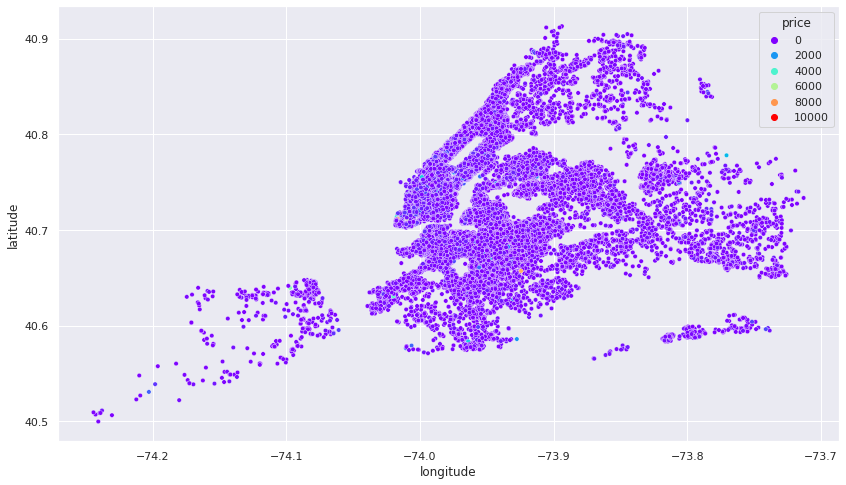

In [11]:
#Price Density Map Before Removing Outliers
plt.figure(figsize=(14,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df["price"], s=20, palette="rainbow")

(array([4.8197e+04, 5.2100e+02, 6.7000e+01, 4.8000e+01, 1.9000e+01,
        8.0000e+00, 9.0000e+00, 8.0000e+00, 0.0000e+00, 6.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([    0.        ,   666.66666667,  1333.33333333,  2000.        ,
         2666.66666667,  3333.33333333,  4000.        ,  4666.66666667,
         5333.33333333,  6000.        ,  6666.66666667,  7333.33333333,
         8000.        ,  8666.66666667,  9333.33333333, 10000.        ]),
 <a list of 15 Patch objects>)

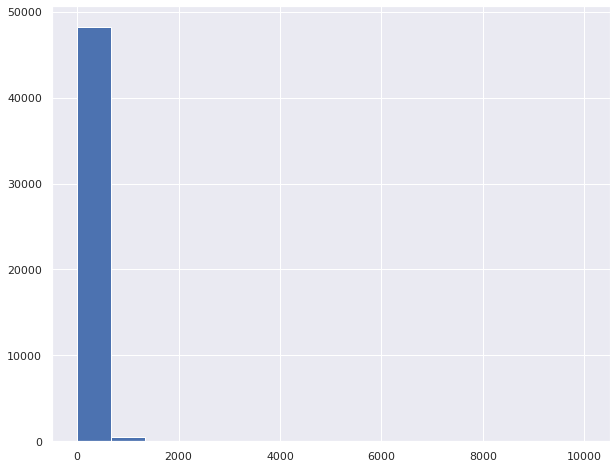

In [13]:
#Histogram Before Removing Outliers
plt.hist(df['price'],bins=15)

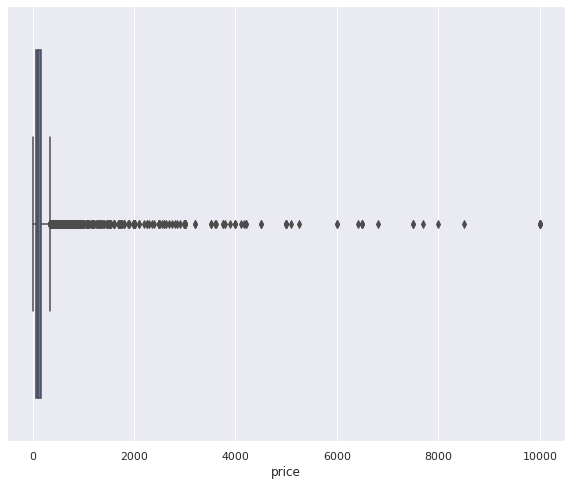

In [15]:
#Boxplot before Removing Outliers
sns.boxplot(x=df['price'])

In [ ]:
df.shape

(48895, 16)

In [16]:
#Determine the 5-number Summary for Price feature
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The Inter Quartile Range (IQR) describes the middle 50% of values when ordered from lowest to highest
To find the IQR, first find the median (middle value) of the lower and upper half of the data. These values are lower half quartile 1 (Q1) and upper half quartile 3 (Q3).

The IQR is the difference between Q3 and Q1.

In [17]:
#Determine Quantile Ranges
df.quantile([.25,.5,.75],axis=0)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0.25,9471945.0,7822033.0,40.690100,-73.983070,69.0,1.0,1.0,0.19,1.0,0.0
0.50,19677284.0,30793816.0,40.723070,-73.955680,106.0,3.0,5.0,0.72,1.0,45.0
0.75,29152178.5,107434423.0,40.763115,-73.936275,175.0,5.0,24.0,2.02,2.0,227.0


In [18]:
#Determine rhe IQR for the Dataframe. Note: The IQR is not affected by outliers, it is used to measure the spread of the middle 50% of values
#The range, std dev, andvariance ARE affecrted by outliers.
#Determine the IQR for the dataframe.
Q1=df.quantile(0.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [19]:
#Remove all observations with outliers
df=df[~((df<(Q1-1.5*IQR))|(df >(Q3+1.5*IQR))).any(axis=1)]
df.shape

(27813, 16)

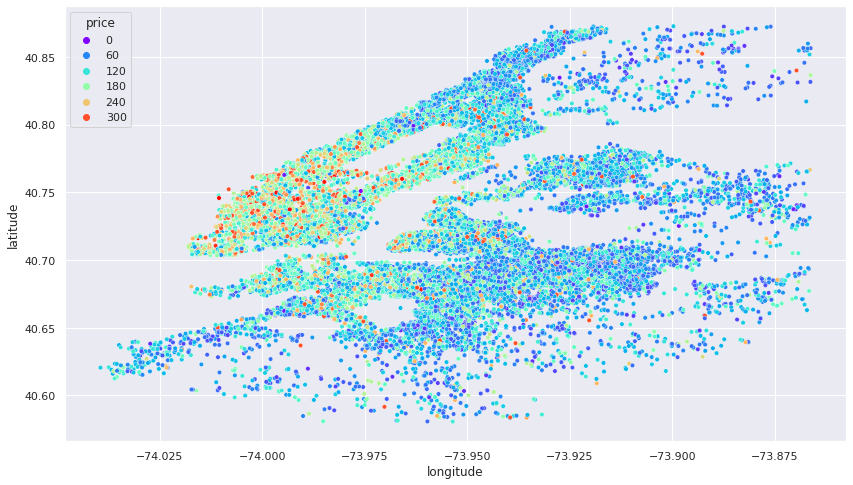

In [20]:
#Price Density Map AFTER Removing Outliers
plt.figure(figsize=(14,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'],hue=df["price"], s=20, palette='rainbow')

(array([  56., 1504., 4838., 4408., 4206., 2712., 2888., 1589., 2448.,
         440.,  604., 1007.,  348.,  631.,  134.]),
 array([  0.        ,  22.26666667,  44.53333333,  66.8       ,
         89.06666667, 111.33333333, 133.6       , 155.86666667,
        178.13333333, 200.4       , 222.66666667, 244.93333333,
        267.2       , 289.46666667, 311.73333333, 334.        ]),
 <a list of 15 Patch objects>)

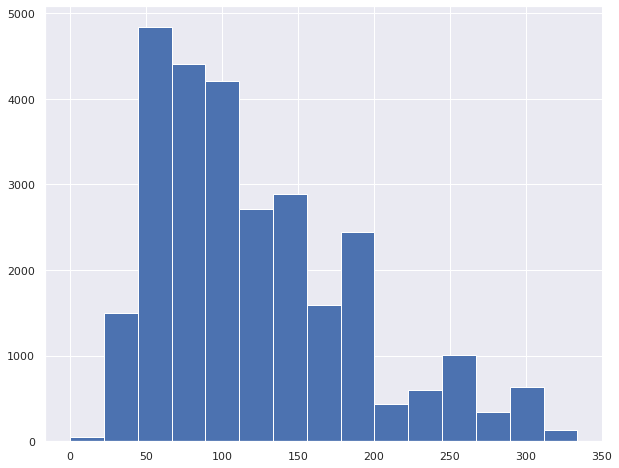

In [21]:
#Histogram AFTER Removing Outliers
plt.hist(df['price'],bins=15)

In [22]:
#List price frequencies for room type
print(df['room_type'].value_counts(normalize=True))

Entire home/apt    0.501133
Private room       0.480854
Shared room        0.018013
Name: room_type, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b6f52b410>,
      dtype=object)

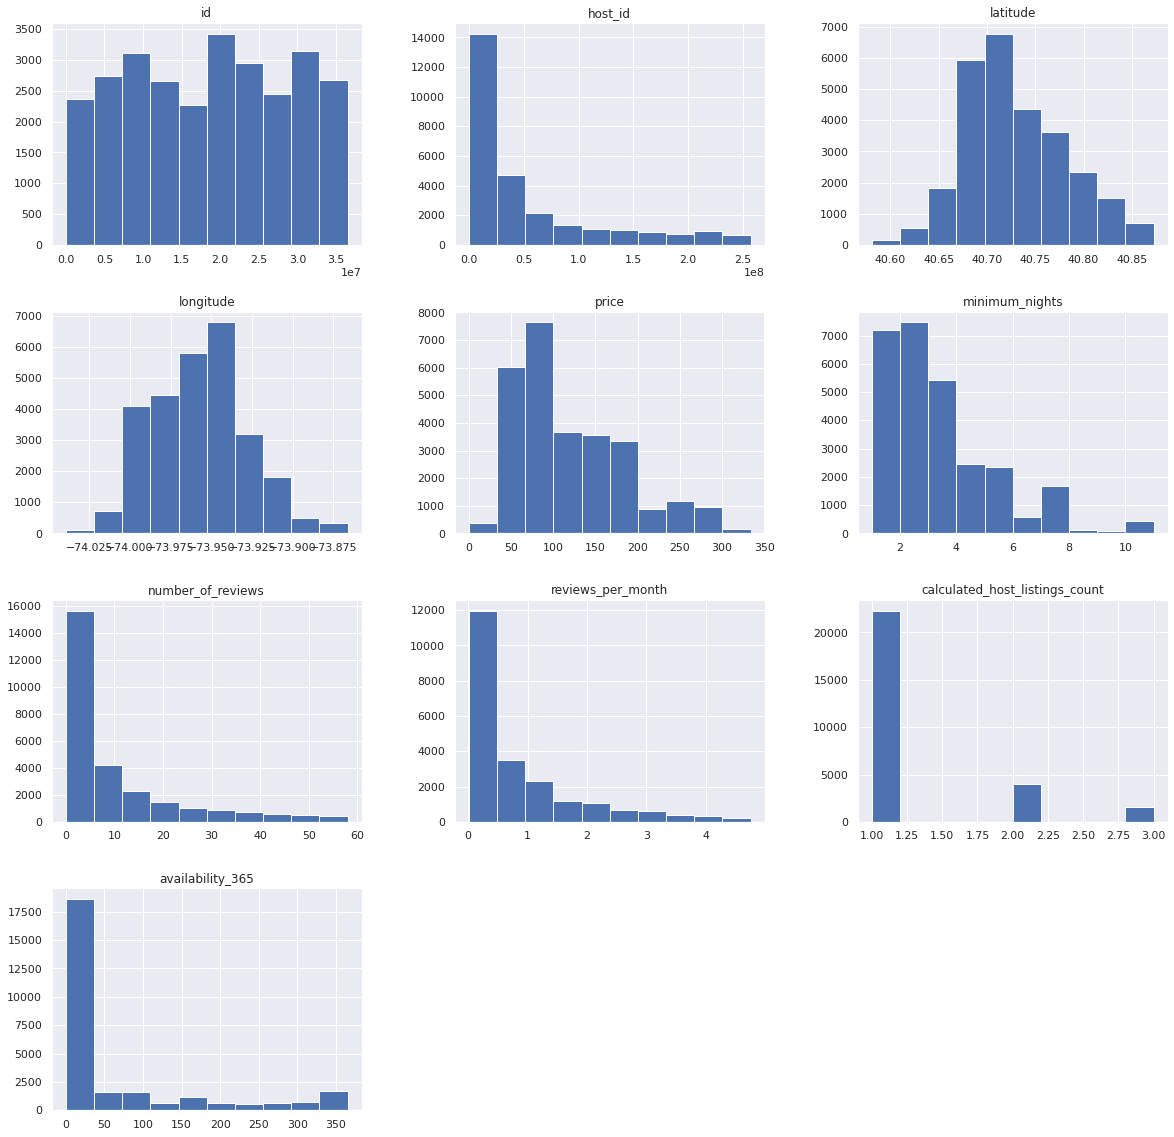

In [23]:
#Create Histograms for all continuous variables
df.hist(bins=10,figsize=(20,20),color='b')

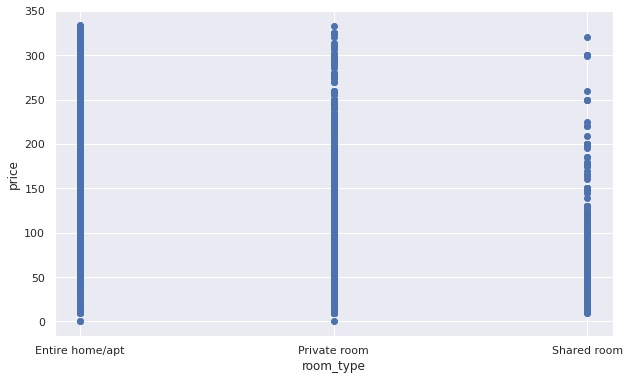

In [24]:
#Detect correlation betwen variables using a scatterplot
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['room_type'],df['price'])
ax.set_xlabel('room_type')
ax.set_ylabel('price')
plt.show()

In [25]:
# Create a 5-number summary by price for each neighbourhood group
set(df['neighbourhood_group'])
{'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,371.0,77.805930,45.508361,10.0,45.0,65.0,100.0,300.0
Brooklyn,13089.0,107.713882,61.019658,0.0,60.0,90.0,145.0,333.0
Manhattan,12164.0,143.821358,68.840739,0.0,90.0,131.0,195.0,334.0
Queens,2189.0,93.078118,50.622504,11.0,55.0,80.0,115.0,325.0


In [26]:
# Create a cross-tabulation ofthe data (see average price by neighbourhood group)
df.pivot_table(index='neighbourhood_group',columns='room_type', values='price',aggfunc='median')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,109.5,55.0,50.0
Brooklyn,140.0,65.0,47.0
Manhattan,175.0,89.0,69.0
Queens,120.0,62.0,45.0


In [27]:
df.pivot_table(index='neighbourhood_group',columns='room_type', values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,116.596491,60.605042,60.526316
Brooklyn,149.389747,71.636589,65.207792
Manhattan,179.170200,98.515962,82.387218
Queens,131.134977,69.446275,56.080645


In [28]:
ny_map=folium.Map(location=[40.7,-74],zoom_start=10)
data_loc=df[['longitude','latitude']].values
data_loc=data_loc.tolist()
hm=plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

In [29]:
# Group each neighbourhood group with related neighborhoods by top five expensive neighborhoods, k=listing count and average price
for gp in set (df['neighbourhood_group']):
  print(df.loc[df['neighbourhood_group']==gp,].groupby(['neighbourhood_group','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price','mean'),ascending=False).head())
print()

                                     price            
                                     count        mean
neighbourhood_group neighbourhood                     
Queens              Corona               1  150.000000
                    Long Island City   331  110.725076
                    Middle Village      17  110.411765
                    Glendale            32  100.906250
                    Astoria            627   98.875598
                                      price            
                                      count        mean
neighbourhood_group neighbourhood                      
Brooklyn            DUMBO                17  169.882353
                    Brooklyn Heights    107  160.644860
                    Vinegar Hill         20  157.800000
                    Cobble Hill          64  151.312500
                    Downtown Brooklyn    63  149.952381
                                      price            
                                      count        mean


In [30]:
#Determine number of required occupancy by neighbourhood group
df.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,371.0,2.312668,1.571478,1.0,1.0,2.0,3.0,10.0
Brooklyn,13089.0,2.980976,1.977414,1.0,2.0,2.0,4.0,11.0
Manhattan,12164.0,2.918695,1.975360,1.0,1.0,2.0,4.0,11.0
Queens,2189.0,2.737323,1.901597,1.0,1.0,2.0,3.0,11.0


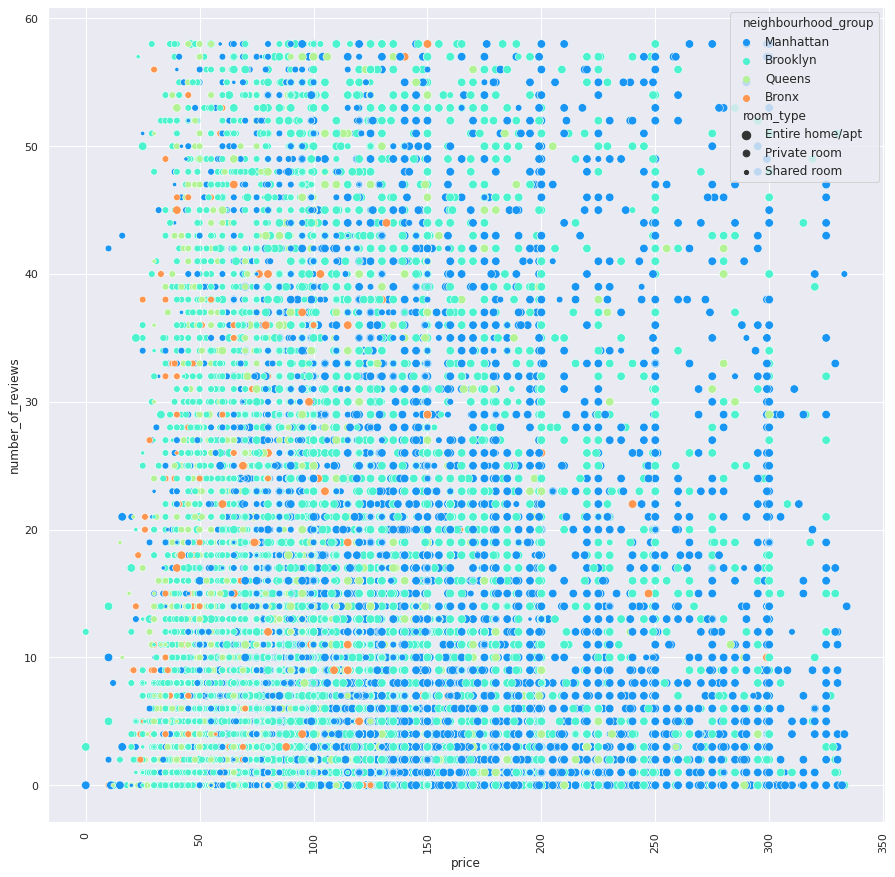

In [31]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.scatterplot(y='number_of_reviews', x='price', size='room_type',hue='neighbourhood_group',palette='rainbow', data=df)

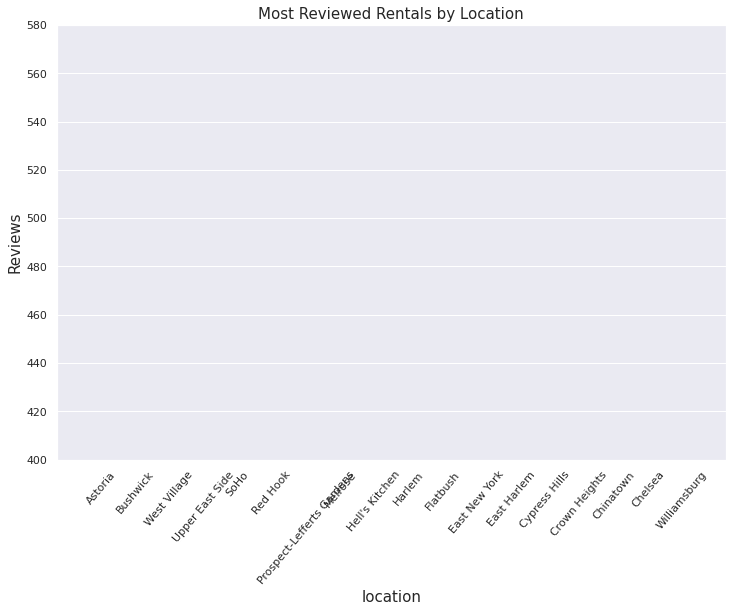

In [32]:
#The most reviewed listing locations by neighborhood
review=df.sort_values('number_of_reviews', ascending=False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig4,ax3=plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='cyan',ax=ax3)
plt.plot(top_reviewed['number_of_reviews'], marker='o',color='red',linestyle='--')
plt.ylabel('Reviews', fontsize=15)
plt.xlabel('location', fontsize=15)
plt.ylim((400,580))
for ax in ax3.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most Reviewed Rentals by Location',fontsize='15')
plt.show()
sns.set()

<function matplotlib.pyplot.close>

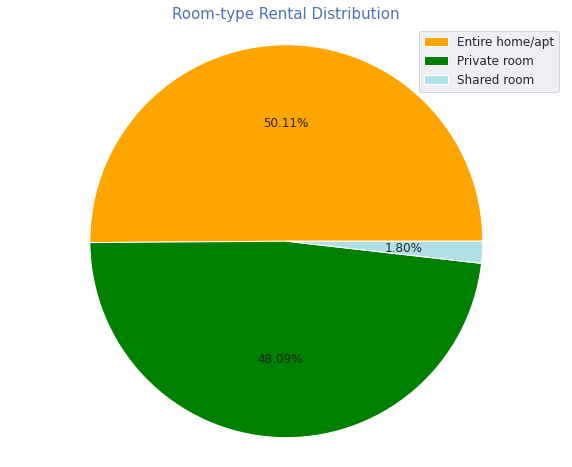

In [33]:
#What portion of rentals correspond to room type
room_type=df.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['orange','green','powderblue'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize=12)
plt.title('Room-type Rental Distribution', fontsize='15', color='b')
plt.show
plt.close

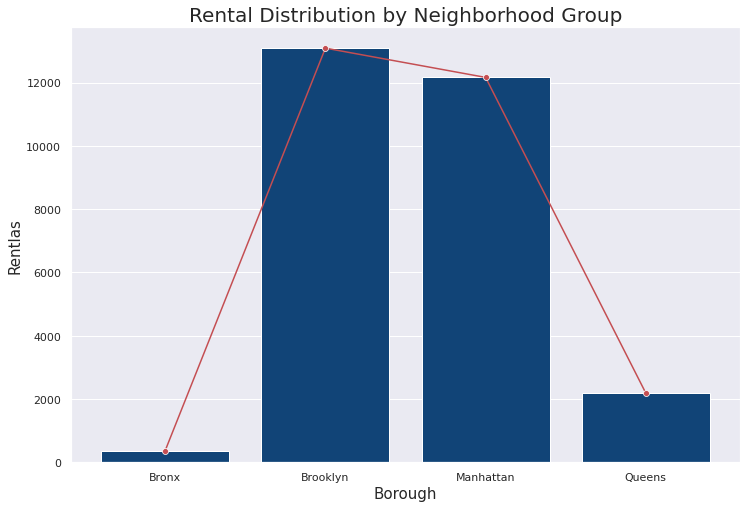

In [34]:
neighbourhood=df.groupby('neighbourhood_group')['neighbourhood'].count().reset_index()
fix,ax=plt.subplots(figsize=(12,8))
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],
y=neighbourhood[neighbourhood.columns[1]],color='#004488',ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='r',marker='o',ax=ax)
plt.ylabel('Rentlas', fontsize='15')
plt.xlabel('Borough', fontsize=15)
plt.title('Rental Distribution by Neighborhood Group', fontsize=20)
plt.show()
sns.set()

In [35]:
#Determine if there is a correlation between price and number of reviews per month for each neighbourhood group
for gp in set(df['neighbourhood_group']):
  print(gp)
  print(df[df['neighbourhood_group']==gp][['price','number_of_reviews']].corr())
  print()

Queens
                     price  number_of_reviews
price              1.00000           -0.01599
number_of_reviews -0.01599            1.00000

Brooklyn
                      price  number_of_reviews
price              1.000000           0.047918
number_of_reviews  0.047918           1.000000

Manhattan
                     price  number_of_reviews
price              1.00000           -0.00213
number_of_reviews -0.00213            1.00000

Bronx
                      price  number_of_reviews
price              1.000000          -0.066313
number_of_reviews -0.066313           1.000000



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


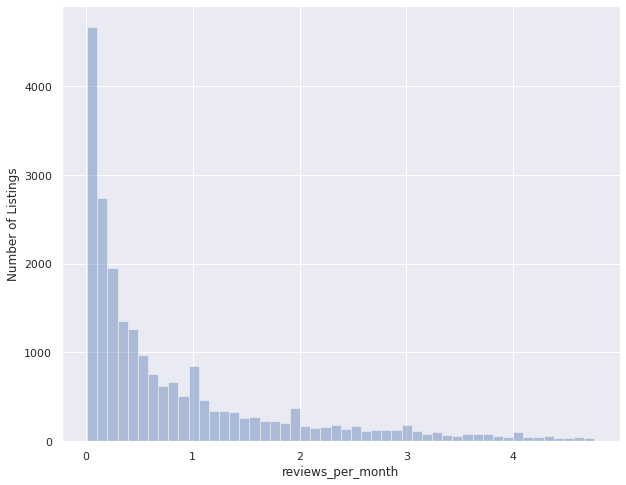

In [36]:
sns.distplot(df['reviews_per_month'],kde=False)
plt.ylabel('Number of Listings')
plt.show()

In [37]:
# Create a filter based on criteria of interest
upper_east=df[df['neighbourhood']=='Upper East Side']
ninetieth_percentile=np.quantile(upper_east['number_of_reviews'], 0.85)
upper_east = upper_east[upper_east['number_of_reviews'] >= ninetieth_percentile]
upper_east = upper_east.sort_values('price',ascending=True) 
private_room = upper_east[upper_east['room_type']=='Private room'].reset_index()
entire_home = upper_east[upper_east['room_type']=='Entire home/apt'].reset_index()
shared_room = upper_east[upper_east['room_type']== 'Shared Room'].reset_index()
private_affordable = private_room.loc[0,:].reset_index()
private_affordable.rename(columns={'index':'data','0':'values'},inplace=True)
entire_affordable=entire_home.loc[0,:].reset_index()
entire_affordable.rename(columns={'index':'data','0':'values'},inplace=True)

In [38]:
#Which entire home listing is mor=st affordable?
entire_affordable

,data,0
0,index,4647
1,id,3258197
2,name,Large 1br Duplex in Heart of Upper East Side
3,host_id,16477306
4,host_name,Jeff
5,neighbourhood_group,Manhattan
6,neighbourhood,Upper East Side
7,latitude,40.7687
8,longitude,-73.9555
9,room_type,Entire home/apt


In [ ]:
#Whick private room listing is most qffordable?
private_affordable

,data,0
0,index,24574
1,id,19763298
2,name,Large-sunny-private room & bathroom in UES hi ...
3,host_id,12825778
4,host_name,Laura
5,neighbourhood_group,Manhattan
6,neighbourhood,Upper East Side
7,latitude,40.7827
8,longitude,-73.9505
9,room_type,Private room


# SQL Searching Technicues for Exploration


In [39]:
#Select Top 5 form the Data Frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21


In [40]:
#Select Top 3 last_review, price from df
df[['last_review', 'price']].head(3)

,last_review,price
1,2019-05-21,225
2,NaN,150
4,2018-11-19,80


In [43]:
#Slect top 5 from where neighbourhood_group - 'Brooklyn' (NOTE == is used because single = assigns in Python, does not mean equal to)
df.query("neighbourhood_group=='Brooklyn'").head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
25,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,60,1,19,2019-06-23,1.37,2,85
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
41,12299,Beautiful Sunny Park Slope Brooklyn,47610,Abdul,Brooklyn,South Slope,40.66278,-73.97966,Entire home/apt,120,3,15,2019-05-27,0.39,1,345


In [46]:
#Select *from where neighbourhood IN ('Kensington' and 'Park Slope")
df.query('neighbourhood==["Kensington","Park Slope"]')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
66,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
184,46544,Park Slope haven 15 mins from Soho,8198,Monica,Brooklyn,Park Slope,40.67994,-73.97863,Entire home/apt,150,5,52,2019-06-05,0.50,1,18
258,63546,Large and Cozy Private Bedroom,308652,Antonín,Brooklyn,Kensington,40.64106,-73.97426,Private room,39,1,45,2019-05-16,0.46,2,365
281,65834,Beautiful 1 Bedroom Apt Park Slope,321934,Jessica,Brooklyn,Park Slope,40.67319,-73.97323,Entire home/apt,175,2,11,2013-05-02,0.11,1,246
393,121861,"Park Slope Apt:, Spacious 2 bedroom",611716,Elizabeth,Brooklyn,Park Slope,40.67644,-73.98082,Entire home/apt,165,2,23,2016-05-02,0.23,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47963,36003288,Apartment in Kensington area of Brooklyn,161196794,Pearl,Brooklyn,Kensington,40.64126,-73.97797,Entire home/apt,169,1,2,2019-06-30,2.00,1,53
47986,36025798,Beautiful and light-filled Park Slope studio,23384343,Chloe,Brooklyn,Park Slope,40.68258,-73.97771,Entire home/apt,100,5,0,NaN,NaN,1,8
48216,36142215,SUMMER RENTAL IN SUNNY SPACIOUS ROOM,41484943,Melissa,Brooklyn,Kensington,40.63676,-73.97448,Private room,54,7,0,NaN,NaN,2,225
48524,36308600,Cozy and Beautiful Park Slope One Bedroom,74773867,Kailey,Brooklyn,Park Slope,40.67455,-73.98477,Entire home/apt,150,1,1,2019-07-05,1.00,1,8


In [52]:
#select from df where neighbourhood NOT in ('Kensington Prk Slope') != means Not Equal To
df.query('neighbourhood!=["Kensington","Park Slope"]')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [54]:
#Select * from where neighbourhood is Like ('PA%) - NOTE - Case Sensitive
df[df['neighbourhood'].str.match("Pa")]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
66,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
184,46544,Park Slope haven 15 mins from Soho,8198,Monica,Brooklyn,Park Slope,40.67994,-73.97863,Entire home/apt,150,5,52,2019-06-05,0.50,1,18
281,65834,Beautiful 1 Bedroom Apt Park Slope,321934,Jessica,Brooklyn,Park Slope,40.67319,-73.97323,Entire home/apt,175,2,11,2013-05-02,0.11,1,246
393,121861,"Park Slope Apt:, Spacious 2 bedroom",611716,Elizabeth,Brooklyn,Park Slope,40.67644,-73.98082,Entire home/apt,165,2,23,2016-05-02,0.23,2,7
411,136493,Stunning arty 3200sf 3FLR+3BR townhome w/terrace,663384,Irena,Brooklyn,Park Slope,40.67632,-73.97616,Entire home/apt,250,7,18,2019-05-27,0.21,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47642,35842545,Cozy perfection in the middle of everything,2880794,Brandy,Brooklyn,Park Slope,40.67757,-73.98037,Entire home/apt,115,3,1,2019-07-02,1.00,1,29
47951,36000864,Grand and Bright Home in Historic Park Slope,185212,Marc,Brooklyn,Park Slope,40.67091,-73.97479,Entire home/apt,168,5,0,NaN,NaN,1,23
47986,36025798,Beautiful and light-filled Park Slope studio,23384343,Chloe,Brooklyn,Park Slope,40.68258,-73.97771,Entire home/apt,100,5,0,NaN,NaN,1,8
48524,36308600,Cozy and Beautiful Park Slope One Bedroom,74773867,Kailey,Brooklyn,Park Slope,40.67455,-73.98477,Entire home/apt,150,1,1,2019-07-05,1.00,1,8


In [55]:
#Select * from df where last_review is blank (NILL)
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
265,63913,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",312288,Paula,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,NaN,2,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [56]:
# Select * from the df where last_review is NOT NULL
df[df['last_review'].notna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,1,2019-07-06,1.00,1,7
48615,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.00,1,165
48732,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,1,2019-07-06,1.00,1,13
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147


In [57]:
#Select * from df where neighbourg=hood_group is not Brooklyn
df[df['neighbourhood_group']!='Brooklyn']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48876,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Manhattan,Harlem,40.80953,-73.95410,Private room,60,1,0,NaN,NaN,1,26
48883,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79755,-73.93614,Private room,75,2,0,NaN,NaN,2,364
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [59]:
#Select * from df where mininum_nights between 2 and 8
df[df['minimum_nights'].between(2,8)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48883,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79755,-73.93614,Private room,75,2,0,NaN,NaN,2,364
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [65]:
#Swelect * from df where minimum_nights is NOT between 2 and 8
df[~df['minimum_nights'].between(2,8)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
25,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,60,1,19,2019-06-23,1.37,2,85
27,9357,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,58,2017-08-13,0.49,1,75
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48873,36477307,Brooklyn paradise,241945355,Clement & Rose,Brooklyn,Flatlands,40.63116,-73.92616,Entire home/apt,170,1,0,NaN,NaN,2,363
48876,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Manhattan,Harlem,40.80953,-73.95410,Private room,60,1,0,NaN,NaN,1,26
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365


In [72]:
#select * from df where reviews_per_month equals 1 AND the room type is shared
df[(df['reviews_per_month']==1) & (df['room_type']=='Private room')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2626,1378165,Sunny Brooklyn Artists' Enclave! *huge room!*,7465509,Tyler,Brooklyn,Bedford-Stuyvesant,40.68732,-73.93004,Private room,67,7,2,2019-06-21,1.0,1,14
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.0,1,359
7910,6063050,Private Room in 3BD Apt with a queen bed,9897580,David,Brooklyn,Bedford-Stuyvesant,40.68669,-73.93452,Private room,55,3,51,2019-06-19,1.0,1,340
8845,6784207,Single Room in 2 bedroom apt.,6387355,Eric,Brooklyn,Bushwick,40.69959,-73.92975,Private room,64,2,48,2019-06-22,1.0,2,318
17142,13580148,"Sunny Rms w Utilities Incl, 15 mins to Manhattan",2261995,Sarah,Brooklyn,Bedford-Stuyvesant,40.68232,-73.94401,Private room,75,2,1,2019-06-10,1.0,3,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48532,36310268,Full size room,171482981,Alejandro,Queens,Maspeth,40.71327,-73.90982,Private room,65,2,1,2019-07-06,1.0,1,21
48576,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,1,2019-07-06,1.0,1,7
48615,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.0,1,165
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147


In [70]:
#select * from df where reviews_per_month equals 1 OR the room type is shared
df[(df['reviews_per_month']==1)| (df['room_type']=='Shared')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2626,1378165,Sunny Brooklyn Artists' Enclave! *huge room!*,7465509,Tyler,Brooklyn,Bedford-Stuyvesant,40.68732,-73.93004,Private room,67,7,2,2019-06-21,1.0,1,14
3690,2222641,Charming West Village 1 Bed - Ideal Location,11340369,Rachel,Manhattan,West Village,40.73823,-74.00233,Entire home/apt,165,7,1,2019-06-30,1.0,1,8
3941,2453730,"Sunny, charming duplex in best Brooklyn 'hood",10232293,Georgia,Brooklyn,Gowanus,40.67906,-73.99093,Entire home/apt,180,6,1,2019-07-05,1.0,1,26
4313,2879157,Family Friendly Apt,6122006,Allison,Manhattan,Morningside Heights,40.81153,-73.95856,Entire home/apt,125,2,27,2019-06-16,1.0,2,0
5628,4096470,THE THOMPSON SUITE,4065620,Debbie,Brooklyn,Bedford-Stuyvesant,40.68663,-73.93790,Entire home/apt,155,3,1,2019-07-01,1.0,2,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,1,2019-07-06,1.0,1,7
48615,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.0,1,165
48732,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,1,2019-07-06,1.0,1,13
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147


Wrap up and Export Data

In [73]:
#Verift that it's still the working directory
!pwd

/content/drive/My Drive/Data Analytics/Data Analytics 2/Colab Notebooks/Abnb Project


In [75]:
#Copy Cleaned dataset (from data frame) to Google Drive - df has been cleaned of outliers
df.to_csv('cleaned_AIRBNB.csv')
!cp cleaned_AIRBNB.csv '/'

In [78]:
#List the contents of the current folder on Google Drive
!ls "/content/drive/My Drive/Data Analytics/Data Analytics 2/Colab Notebooks/Abnb Project"

AB_NYC_2019.csv  AirBnbPart2.ipynb  cleaned_AIRBNB.csv	LICENSE  README.md
